# **Project Title**: Sentiment Analysis of Text Data using Machine Learning and Ensemble Techniques

**Importing Libraries**: Import necessary libraries for data manipulation, visualization, model training, and evaluation.

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE

**Loading Dataset**: Load the dataset from the given CSV file ('Sentiment.csv') into a DataFrame using pandas.


In [ ]:
# Step 2: Load dataset
data = pd.read_csv('/content/Sentiment.csv')

**Display Initial Rows**: Display the first few rows of the dataset to understand its structure and contents.

In [ ]:
# Step 3: Display initial rows of the dataset
print("Initial rows of the dataset:")
print(data.head())

Initial rows of the dataset:
   id               candidate  candidate_confidence relevant_yn  \
0   1  No candidate mentioned                   1.0         yes   
1   2            Scott Walker                   1.0         yes   
2   3  No candidate mentioned                   1.0         yes   
3   4  No candidate mentioned                   1.0         yes   
4   5            Donald Trump                   1.0         yes   

   relevant_yn_confidence sentiment  sentiment_confidence     subject_matter  \
0                     1.0   Neutral                0.6578  None of the above   
1                     1.0  Positive                0.6333  None of the above   
2                     1.0   Neutral                0.6629  None of the above   
3                     1.0  Positive                1.0000  None of the above   
4                     1.0  Positive                0.7045  None of the above   

   subject_matter_confidence candidate_gold  ... relevant_yn_gold  \
0                 

**Checking for Missing Values**: Check for missing values in the dataset to identify any potential data quality issues.

In [ ]:
# Step 4: Check for missing values
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 id                               0
candidate                       96
candidate_confidence             0
relevant_yn                      0
relevant_yn_confidence           0
sentiment                        0
sentiment_confidence             0
subject_matter                 326
subject_matter_confidence        0
candidate_gold               13843
name                             0
relevant_yn_gold             13839
retweet_count                    0
sentiment_gold               13856
subject_matter_gold          13853
text                             0
tweet_coord                  13850
tweet_created                    0
tweet_id                         0
tweet_location                3912
user_timezone                 4403
dtype: int64


 **Removing Missing Values**: Remove rows with missing values in specific columns ('text' and 'sentiment') to ensure data completeness.

In [ ]:
# Step 5: Remove missing values
data.dropna(subset=['text', 'sentiment'], inplace=True)

 **Removing Duplicates**: Remove duplicate rows from the dataset to eliminate redundant information and maintain data integrity.

In [ ]:
# Step 6: Remove duplicates
data.drop_duplicates(inplace=True)

**Displaying Distribution Before SMOTE**: Visualize the distribution of sentiment classes before applying SMOTE to understand the class distribution imbalance.

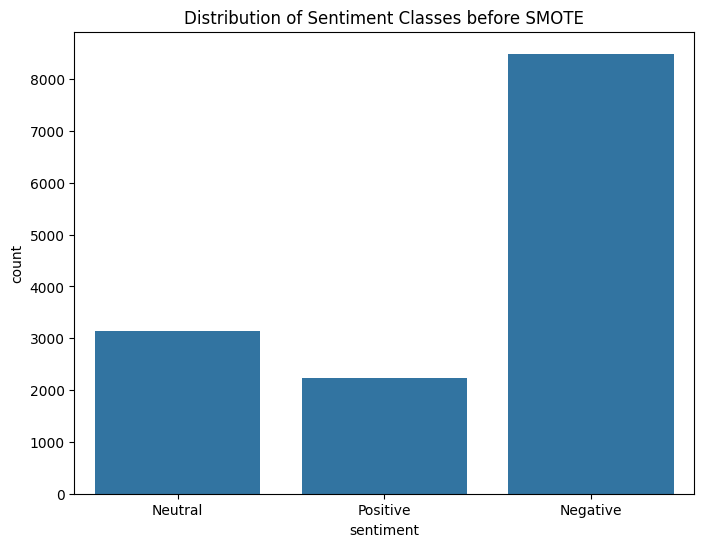

In [ ]:
# Step 7: Display distribution of sentiment classes before SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data)
plt.title('Distribution of Sentiment Classes before SMOTE')
plt.show()

**Preprocessing - Removing Neutral Sentiments**: Remove rows with neutral sentiments from the dataset as they may not contribute to sentiment analysis tasks.

In [ ]:
# Step 8: Preprocessing - Remove neutral sentiments
data = data[data['sentiment'] != "Neutral"]

**Train-Test Split**: Split the preprocessed data into training and testing sets to evaluate model performance on unseen data.

In [ ]:
# Step 9: Train-test split
train, test = train_test_split(data, test_size=0.2, random_state=42)

 **Feature Engineering - TF-IDF Vectorization**: Convert text data into numerical features using TF-IDF vectorization, which represents the importance of words in documents.

In [ ]:
# Step 10: Feature Engineering - TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train['text'])
X_test = vectorizer.transform(test['text'])
y_train = train['sentiment']
y_test = test['sentiment']

**Applying SMOTE**: Apply the Synthetic Minority Over-sampling Technique (SMOTE) to balance the class distribution by generating synthetic samples for the minority class.

In [ ]:
# Step 11: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**Displaying Distribution After SMOTE**: Visualize the distribution of sentiment classes after applying SMOTE to verify if the class imbalance issue has been addressed.

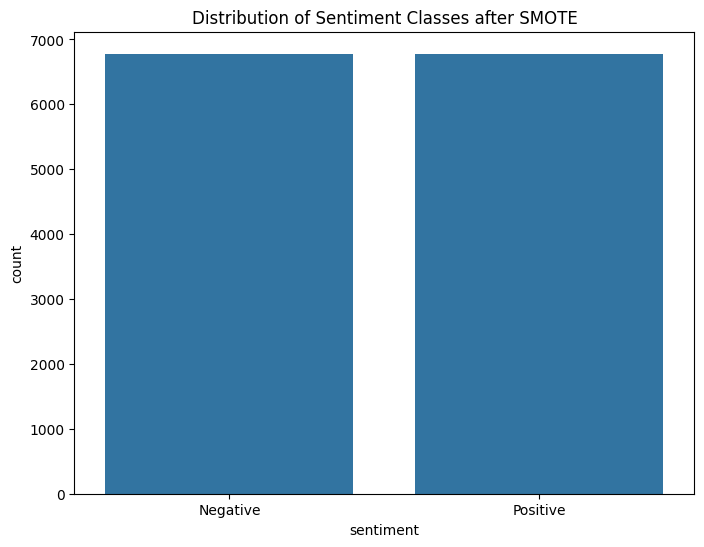

In [ ]:
# Step 12: Display distribution of sentiment classes after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_smote)
plt.title('Distribution of Sentiment Classes after SMOTE')
plt.show()

 **Model Building and Evaluation with Balanced Data**: Train multiple classification models (Multinomial Naive Bayes, Logistic Regression, and Random Forest) using the balanced training data and evaluate their performance on the original test data.


Training Multinomial Naive Bayes...
Multinomial Naive Bayes Accuracy: 0.80
              precision    recall  f1-score   support

    Negative       0.92      0.82      0.87      1713
    Positive       0.50      0.72      0.59       433

    accuracy                           0.80      2146
   macro avg       0.71      0.77      0.73      2146
weighted avg       0.84      0.80      0.81      2146



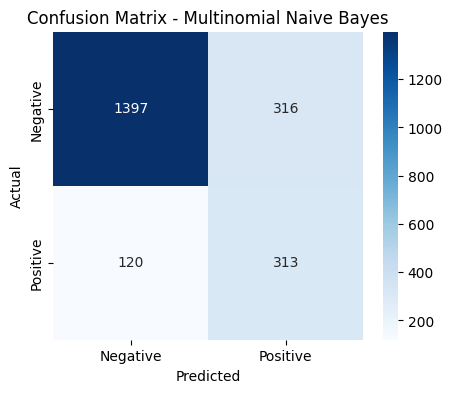

Training Logistic Regression...
Logistic Regression Accuracy: 0.83
              precision    recall  f1-score   support

    Negative       0.92      0.87      0.89      1713
    Positive       0.57      0.69      0.63       433

    accuracy                           0.83      2146
   macro avg       0.74      0.78      0.76      2146
weighted avg       0.85      0.83      0.84      2146



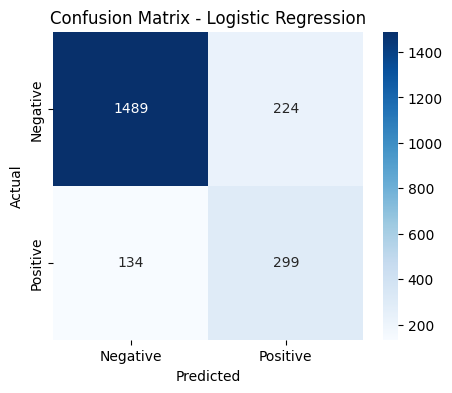

Training Random Forest...
Random Forest Accuracy: 0.85
              precision    recall  f1-score   support

    Negative       0.87      0.95      0.91      1713
    Positive       0.72      0.46      0.56       433

    accuracy                           0.85      2146
   macro avg       0.80      0.71      0.74      2146
weighted avg       0.84      0.85      0.84      2146



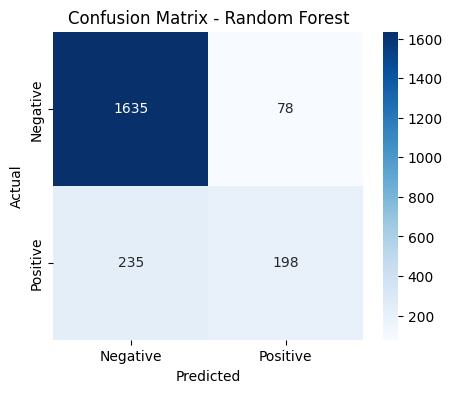

In [ ]:
# Step 13: Model Building and Evaluation with balanced data
models = [
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42))
]

for name, model in models:
    print(f"Training {name}...")
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


**Voting Classifier with Balanced Data**: Create a Voting Classifier ensemble model using the previously trained models and fit it to the balanced training data.

In [ ]:
# Step 14: Voting Classifier with balanced data
voting_classifier = VotingClassifier(estimators=models, voting='hard')
voting_classifier.fit(X_train_smote, y_train_smote)
y_pred_voting = voting_classifier.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

**Printing Voting Classifier Results**: Print the accuracy and classification report of the Voting Classifier with the original test data. Also, visualize the confusion matrix to understand the model's performance.


Voting Classifier Accuracy with SMOTE: 0.8397017707362535
              precision    recall  f1-score   support

    Negative       0.91      0.88      0.90      1713
    Positive       0.59      0.67      0.63       433

    accuracy                           0.84      2146
   macro avg       0.75      0.77      0.76      2146
weighted avg       0.85      0.84      0.84      2146



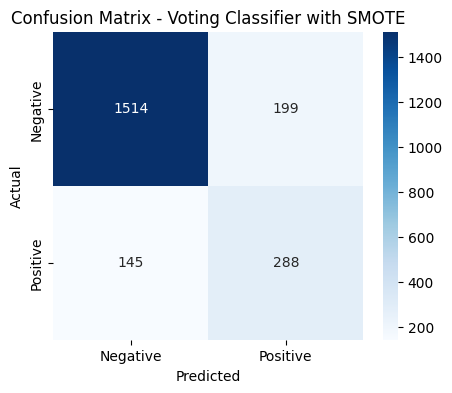

In [ ]:
# Step 15: Print Voting Classifier results with balanced data
print("Voting Classifier Accuracy with SMOTE:", accuracy_voting)
print(classification_report(y_test, y_pred_voting))
cm_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues', xticklabels=voting_classifier.classes_, yticklabels=voting_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Voting Classifier with SMOTE')
plt.show()

Determining the Best Model (Voting Classifier): Determine the best model according to the voting classifier's evaluation results. This is done by identifying the model with the highest accuracy score on the original test data.

In [ ]:
# Step 16: Determine the best model according to voting classifier
best_model_index_voting = np.argmax([accuracy_score(y_test, model.predict(X_test)) for name, model in models])
best_model_name_voting, best_model_voting = models[best_model_index_voting]
print(f"\nThe best model according to voting classifier is: {best_model_name_voting}")


The best model according to voting classifier is: Random Forest



**Overview:**

In this sentiment analysis project, we aimed to analyze the sentiment of text data using machine learning techniques. The dataset consisted of text samples labeled with sentiment categories such as positive, negative, and neutral. Our primary goal was to build and evaluate machine learning models capable of accurately predicting the sentiment of text data.

**Conclusion:**

In conclusion, our analysis involved several key steps. We began by loading and inspecting the dataset to ensure data quality. We then performed exploratory data analysis to understand the distribution of sentiment classes. Subsequently, we addressed class imbalance using the Synthetic Minority Over-sampling Technique (SMOTE) to create synthetic samples for the minority class.

After balancing the dataset, we proceeded with feature engineering, converting text data into numerical features using TF-IDF vectorization. We trained and evaluated three individual classifiers—Multinomial Naive Bayes, Logistic Regression, and Random Forest—on the balanced dataset. Additionally, we evaluated a Voting Classifier combining these models to leverage ensemble learning.

Based on our evaluation results, the Voting Classifier with SMOTE achieved an accuracy of approximately 0.84, demonstrating balanced performance in terms of precision and recall for both positive and negative sentiment classes. This highlights the effectiveness of ensemble methods combined with techniques like SMOTE for achieving balanced performance in sentiment analysis tasks.

Overall, our analysis underscores the importance of addressing class imbalance and leveraging ensemble learning techniques for accurate sentiment analysis of text data.